## Lesson 16 - Pandas Group Operations

### Readings

* McKinney: [Chapter 10. Data Aggregation and Group Operations](http://proquest.safaribooksonline.com/book/programming/python/9781491957653/data-aggregation-and-group-operations/groupby_html)

### Table of Contents

* [Index operations](#index)
* [Groupby](#groupby)
* [Melt](#melt)
* [Pivot](#pivot)
* [Pivot table](#pivot-table)
* [Stack](#stack)
* [Unstack](#unstack)
* [Example with Earth Microbiome Project](#example-emp)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# set max rows
pd.set_option("display.max_rows", 20)

<a id="index"></a>

### index.name, reset_index, inplace=True

In [3]:
# create dataframe
df = pd.read_csv('../data/survey_scores_2015.csv', index_col=0)
df

,10000,13001,60985,43309,89785,57688,19366,97775,22384,31556,70964,70155,47724,37602
subject_id,,,,,,,,,,,,,,
computer_has,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
computer_os,NaN,Mac,Windows,Mac,Windows,Mac,Mac,Mac,Windows,Mac,Mac,Linux,Mac,Linux
score_bash,0,1,0,3,2,1,0,2,0,1,1,1,0,2
score_command,0,2,1,3,2,1,2,2,0,2,1,1,0,2
score_matlab,0,3,1,0,0,1,3,3,2,3,2,1,1,0
score_perl,0,0,0,0,1,0,0,0,0,0,0,0,0,1
score_python,0,0,2,1,2,0,0,1,0,0,1,1,0,1
score_r,0,0,1,2,2,0,2,0,2,0,2,0,0,2


In [4]:
# remove index name
df.index.name = None
df

,10000,13001,60985,43309,89785,57688,19366,97775,22384,31556,70964,70155,47724,37602
computer_has,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
computer_os,NaN,Mac,Windows,Mac,Windows,Mac,Mac,Mac,Windows,Mac,Mac,Linux,Mac,Linux
score_bash,0,1,0,3,2,1,0,2,0,1,1,1,0,2
score_command,0,2,1,3,2,1,2,2,0,2,1,1,0,2
score_matlab,0,3,1,0,0,1,3,3,2,3,2,1,1,0
score_perl,0,0,0,0,1,0,0,0,0,0,0,0,0,1
score_python,0,0,2,1,2,0,0,1,0,0,1,1,0,1
score_r,0,0,1,2,2,0,2,0,2,0,2,0,0,2


In [5]:
# transpose
df = df.transpose()
df.index.name = 'student'
df

,computer_has,computer_os,score_bash,score_command,score_matlab,score_perl,score_python,score_r
student,,,,,,,,
10000,N,NaN,0,0,0,0,0,0
13001,Y,Mac,1,2,3,0,0,0
60985,Y,Windows,0,1,1,0,2,1
43309,Y,Mac,3,3,0,0,1,2
89785,Y,Windows,2,2,0,1,2,2
57688,Y,Mac,1,1,1,0,0,0
19366,Y,Mac,0,2,3,0,0,2
97775,Y,Mac,2,2,3,0,1,0
22384,Y,Windows,0,0,2,0,0,2


In [6]:
# reset index with inplace=True (also see more advanced function pandas.DataFrame.reindex)
df.reset_index(inplace=True)
df

,student,computer_has,computer_os,score_bash,score_command,score_matlab,score_perl,score_python,score_r
0,10000,N,NaN,0,0,0,0,0,0
1,13001,Y,Mac,1,2,3,0,0,0
2,60985,Y,Windows,0,1,1,0,2,1
3,43309,Y,Mac,3,3,0,0,1,2
4,89785,Y,Windows,2,2,0,1,2,2
5,57688,Y,Mac,1,1,1,0,0,0
6,19366,Y,Mac,0,2,3,0,0,2
7,97775,Y,Mac,2,2,3,0,1,0
8,22384,Y,Windows,0,0,2,0,0,2
9,31556,Y,Mac,1,2,3,0,0,0


In [7]:
# delete column score_bash because it's mostly redundant with score_command
df.drop('score_bash', axis=1, inplace=True)
df

,student,computer_has,computer_os,score_command,score_matlab,score_perl,score_python,score_r
0,10000,N,NaN,0,0,0,0,0
1,13001,Y,Mac,2,3,0,0,0
2,60985,Y,Windows,1,1,0,2,1
3,43309,Y,Mac,3,0,0,1,2
4,89785,Y,Windows,2,0,1,2,2
5,57688,Y,Mac,1,1,0,0,0
6,19366,Y,Mac,2,3,0,0,2
7,97775,Y,Mac,2,3,0,1,0
8,22384,Y,Windows,0,2,0,0,2
9,31556,Y,Mac,2,3,0,0,0


In [8]:
# check datatypes
df.dtypes

student          object
computer_has     object
computer_os      object
score_command    object
score_matlab     object
score_perl       object
score_python     object
score_r          object
dtype: object

In [9]:
# convert score columns to integers
score_cols = ['score_command', 'score_matlab', 'score_perl',
              'score_python', 'score_r']
df[score_cols] = df[score_cols].astype(int)

In [10]:
# check datatypes again
df.dtypes

student          object
computer_has     object
computer_os      object
score_command     int64
score_matlab      int64
score_perl        int64
score_python      int64
score_r           int64
dtype: object

<a id="groupby"></a>

### groupby

Group series using a series of columns or a mapper (dict or key function, apply given function to group, return result as series).

In [11]:
# create group object
comp = df.groupby('computer_os')
comp

In [12]:
# apply sum function
comp.mean()

,score_command,score_matlab,score_perl,score_python,score_r
computer_os,,,,,
Linux,1.500,0.5,0.500000,1.000000,1.000000
Mac,1.625,2.0,0.000000,0.375000,0.750000
Windows,1.000,1.0,0.333333,1.333333,1.666667


In [13]:
# apply std function
comp.std()

,score_command,score_matlab,score_perl,score_python,score_r
computer_os,,,,,
Linux,0.707107,0.707107,0.707107,0.000000,1.414214
Mac,0.916125,1.195229,0.000000,0.517549,1.035098
Windows,1.000000,1.000000,0.577350,1.154701,0.577350


In [14]:
# apply count function
comp.count()

,student,computer_has,score_command,score_matlab,score_perl,score_python,score_r
computer_os,,,,,,,
Linux,2,2,2,2,2,2,2
Mac,8,8,8,8,8,8,8
Windows,3,3,3,3,3,3,3


In [15]:
# we can group by multiple columns, and we can apply a function in-line
# and we can save it as a new dataframe
comp_cmd = df.groupby(['computer_os','score_command']).mean()
comp_cmd

score_matlab  score_perl  score_python  score_r
computer_os score_command                                                 
Linux       1                       1.0         0.0          1.00      0.0
            2                       0.0         1.0          1.00      2.0
Mac         0                       1.0         0.0          0.00      0.0
            1                       1.5         0.0          0.50      1.0
            2                       3.0         0.0          0.25      0.5
            3                       0.0         0.0          1.00      2.0
Windows     0                       2.0         0.0          0.00      2.0
            1                       1.0         0.0          2.00      1.0
            2                       0.0         1.0          2.00      2.0

In [16]:
comp_cmd.index

MultiIndex(levels=[['Linux', 'Mac', 'Windows'], [0, 1, 2, 3]],
           labels=[[0, 0, 1, 1, 1, 1, 2, 2, 2], [1, 2, 0, 1, 2, 3, 0, 1, 2]],
           names=['computer_os', 'score_command'])

In [17]:
comp_cmd.loc['Linux']

,score_matlab,score_perl,score_python,score_r
score_command,,,,
1,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,2.0


In [18]:
comp_cmd.loc['Linux', 1]

score_matlab    1.0
score_perl      0.0
score_python    1.0
score_r         0.0
Name: (Linux, 1), dtype: float64

In [19]:
comp_cmd['score_matlab']

computer_os  score_command
Linux        1                1.0
             2                0.0
Mac          0                1.0
             1                1.5
             2                3.0
             3                0.0
Windows      0                2.0
             1                1.0
             2                0.0
Name: score_matlab, dtype: float64

In [20]:
comp_cmd['score_matlab']['Linux']

score_command
1    1.0
2    0.0
Name: score_matlab, dtype: float64

In [21]:
comp_cmd['score_matlab']['Linux', 1]

1.0

In [22]:
type(comp_cmd['score_matlab'])

pandas.core.series.Series

You may want to ***not*** have the columns you are grouping by become your index. This can be easily achieved as shown below.

In [23]:
comp_cmd2 = df.groupby(['computer_os','score_command'], as_index=False).mean()
comp_cmd2

,computer_os,score_command,score_matlab,score_perl,score_python,score_r
0,Linux,1,1.0,0.0,1.00,0.0
1,Linux,2,0.0,1.0,1.00,2.0
2,Mac,0,1.0,0.0,0.00,0.0
3,Mac,1,1.5,0.0,0.50,1.0
4,Mac,2,3.0,0.0,0.25,0.5
5,Mac,3,0.0,0.0,1.00,2.0
6,Windows,0,2.0,0.0,0.00,2.0
7,Windows,1,1.0,0.0,2.00,1.0
8,Windows,2,0.0,1.0,2.00,2.0


In [24]:
comp_cmd2.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

<a id="melt"></a>

### melt

Massage a DataFrame into a format where one or more columns are identifier variables (`id_vars`), while all other
columns, considered measured variables (`value_vars`), are "unpivoted" to the row axis, leaving just two non-identifier columns, 'variable' and 'value'.

In [25]:
df

,student,computer_has,computer_os,score_command,score_matlab,score_perl,score_python,score_r
0,10000,N,NaN,0,0,0,0,0
1,13001,Y,Mac,2,3,0,0,0
2,60985,Y,Windows,1,1,0,2,1
3,43309,Y,Mac,3,0,0,1,2
4,89785,Y,Windows,2,0,1,2,2
5,57688,Y,Mac,1,1,0,0,0
6,19366,Y,Mac,2,3,0,0,2
7,97775,Y,Mac,2,3,0,1,0
8,22384,Y,Windows,0,2,0,0,2
9,31556,Y,Mac,2,3,0,0,0


In [26]:
# set max rows
pd.set_option("display.max_rows", 80)

In [27]:
df_melted = pd.melt(df, id_vars=['computer_has', 'computer_os'], value_vars=score_cols)
df_melted

,computer_has,computer_os,variable,value
0,N,NaN,score_command,0
1,Y,Mac,score_command,2
2,Y,Windows,score_command,1
3,Y,Mac,score_command,3
4,Y,Windows,score_command,2
5,Y,Mac,score_command,1
6,Y,Mac,score_command,2
7,Y,Mac,score_command,2
8,Y,Windows,score_command,0
9,Y,Mac,score_command,2


/Users/luke/miniconda3/envs/python3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


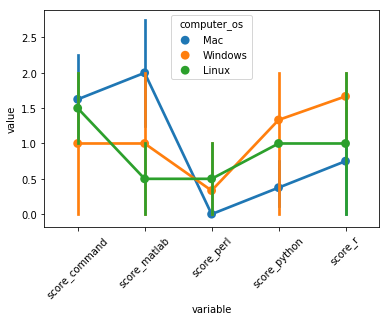

In [28]:
sns.pointplot(x='variable', y='value', hue='computer_os', data=df_melted)
plt.xticks(rotation=45);

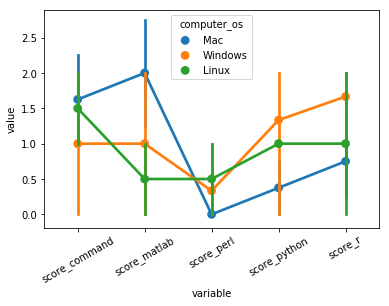

In [29]:
fig, ax = plt.subplots()
sns.pointplot(x='variable', y='value', hue='computer_os', data=df_melted, axis=ax)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=30);

<a id="pivot"></a>

### pivot

Reshape dataframe from long format to wide format. That is, produce a "pivot" table based on column values. Uses unique values from index / columns to form axes of the resulting DataFrame.

`df.pivot(index=None, columns=None, values=None)`

* `index`: string or object. Column name to use to make new frame's index. If None, uses existing index.
* `columns`: string or object. Column name to use to make new frame's columns
* `values`: string or object. Column name to use for populating new frame's values. If not specified, all remaining columns will be used and the result will have hierarchically indexed columns

In [30]:
# example 1: 

df = pd.DataFrame({'foo': ['one','one','one','two','two','two'],
                       'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                       'baz': [1, 2, 3, 4, 5, 6],
                       'faz': [1, 2, 3, 4, 5, 6]})
df

,foo,bar,baz,faz
0,one,A,1,1
1,one,B,2,2
2,one,C,3,3
3,two,A,4,4
4,two,B,5,5
5,two,C,6,6


In [31]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [32]:
df_pivot = df.pivot(index='foo', columns='bar')
df_pivot

baz       faz      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   1  2  3
two   4  5  6   4  5  6

In [33]:
df_pivot['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [34]:
# columns is multi-level
df_pivot.columns

MultiIndex(levels=[['baz', 'faz'], ['A', 'B', 'C']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=[None, 'bar'])

In [35]:
# index is not multi-level
df_pivot.index

Index(['one', 'two'], dtype='object', name='foo')

In [36]:
# example 2: create a dataframe that's "stacked"

import pandas.util.testing as tm; tm.N = 3
def unpivot(frame):
    N, K = frame.shape
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    return pd.DataFrame(data, columns=['date', 'variable', 'value'])
df2 = unpivot(tm.makeTimeDataFrame())
df2

,date,variable,value
0,2000-01-03,A,-0.327982
1,2000-01-04,A,0.719612
2,2000-01-05,A,-1.139251
3,2000-01-03,B,-0.301713
4,2000-01-04,B,-1.343557
5,2000-01-05,B,-0.019316
6,2000-01-03,C,-0.274083
7,2000-01-04,C,-1.770896
8,2000-01-05,C,0.584221
9,2000-01-03,D,-0.832605


If we wanted all the data for variable A, we could do this:

In [37]:
df2[df2['variable'] == 'A']

,date,variable,value
0,2000-01-03,A,-0.327982
1,2000-01-04,A,0.719612
2,2000-01-05,A,-1.139251


But suppose we wish to do time series operations with the variables. A better representation would be where the columns are the unique variables and an index of dates identifies individual observations. 

In [38]:
# to reshape the data into this form, use the pivot function
df2_pivot = df2.pivot(index='date', columns='variable', values='value')
df2_pivot

variable,A,B,C,D
date,,,,
2000-01-03,-0.327982,-0.301713,-0.274083,-0.832605
2000-01-04,0.719612,-1.343557,-1.770896,0.130745
2000-01-05,-1.139251,-0.019316,0.584221,0.737839


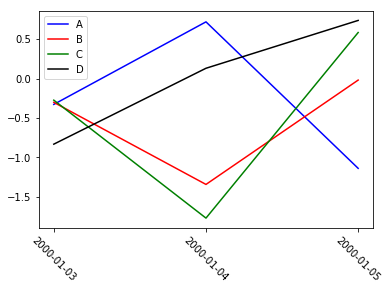

In [39]:
plt.plot(df2_pivot.index, df2_pivot.A, 'b', 
         df2_pivot.index, df2_pivot.B, 'r',
         df2_pivot.index, df2_pivot.C, 'g', 
         df2_pivot.index, df2_pivot.D, 'k')
plt.legend(df2_pivot.columns)
xlabels = [x.strftime('%Y-%m-%d') for x in df2_pivot.index]
plt.xticks(xlabels, xlabels)
plt.xticks(rotation=-45);

<a id="pivot-table"></a>

### pivot_table

Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame. Similar to `pivot`, it is a generalization of pivot that can handle duplicate values for one index/column pair.

`df.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')`

In [40]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7]})
df

,A,B,C,D
0,foo,one,small,1
1,foo,one,large,2
2,foo,one,large,2
3,foo,two,small,3
4,foo,two,small,3
5,bar,one,large,4
6,bar,one,small,5
7,bar,two,small,6
8,bar,two,large,7


In [41]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                       columns=['C'], aggfunc=np.sum)
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

<a id="stack"></a>

### stack

Pivot a level of the column labels (inverse operation from `unstack`).

`df.stack(level=-1, dropna=True)`

* `level`: int, string, or list of these, default last level. Level(s) to stack, can pass level name
* `dropna`: boolean, default True. Whether to drop rows in the resulting Frame/Series with no valid values

In [42]:
df2 = pd.DataFrame(np.random.randint(0, 9, size=(5,3)),
                  index=('sample1', 'sample2', 'sample3', 'sample4', 'sample5'),
                  columns=('feature1', 'feature2', 'feature3'))
df2

,feature1,feature2,feature3
sample1,3,8,3
sample2,4,3,5
sample3,8,7,1
sample4,1,7,2
sample5,2,4,6


In [43]:
df2_stack = df2.stack()
df2_stack

sample1  feature1    3
         feature2    8
         feature3    3
sample2  feature1    4
         feature2    3
         feature3    5
sample3  feature1    8
         feature2    7
         feature3    1
sample4  feature1    1
         feature2    7
         feature3    2
sample5  feature1    2
         feature2    4
         feature3    6
dtype: int64

In [44]:
df2_stack['sample1']

feature1    3
feature2    8
feature3    3
dtype: int64

In [45]:
df2_stack['sample1']['feature1']

3

<a id="unstack"></a>

### unstack

Pivot based on the index values, instead of a column. Requires hierarchical index labels, returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels. If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex). The level involved will automatically get sorted.

`df.unstack(level=-1, fill_value=None)`

* `level`: int, string, or list of these, default -1 (last level) Level(s) of index to unstack, can pass level name
* `fill_value`: replace NaN with this value if the unstack produces missing values

In [46]:
df2_unstack = df2.unstack()
df2_unstack

feature1  sample1    3
          sample2    4
          sample3    8
          sample4    1
          sample5    2
feature2  sample1    8
          sample2    3
          sample3    7
          sample4    7
          sample5    4
feature3  sample1    3
          sample2    5
          sample3    1
          sample4    2
          sample5    6
dtype: int64

In [47]:
df2_unstack['feature1']

sample1    3
sample2    4
sample3    8
sample4    1
sample5    2
dtype: int64

In [48]:
df2_unstack['feature1']['sample1']

3

In [49]:
type(df2), type(df2_stack), type(df2_unstack)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

### value_counts

Get the counts of each value in a Series.

In [50]:
df2.feature1.value_counts()

4    1
3    1
2    1
1    1
8    1
Name: feature1, dtype: int64

Example: Use `value_counts` to find features found in more than 3 samples:

In [51]:
df2 = df2.astype(bool)

In [52]:
for feature in df2.columns:
    num_true = df2[feature].value_counts()[True]
    if num_true > 3:
        print(feature, num_true)

feature1 5
feature2 5
feature3 5


<a id="example-emp"></a>

### Group operations with Earth Microbiome Project metadata

In [53]:
df = pd.read_csv('../data/emp_qiime_mapping_subset_2k.tsv', sep='\t')

In [54]:
df.columns

Index(['#SampleID', 'BarcodeSequence', 'LinkerPrimerSequence', 'Description',
       'host_subject_id', 'study_id', 'title', 'principal_investigator', 'doi',
       'ebi_accession', 'target_gene', 'target_subfragment', 'pcr_primers',
       'illumina_technology', 'extraction_center', 'run_center', 'run_date',
       'read_length_bp', 'sequences_split_libraries',
       'observations_closed_ref_greengenes', 'observations_closed_ref_silva',
       'observations_open_ref_greengenes', 'observations_deblur_90bp',
       'observations_deblur_100bp', 'observations_deblur_150bp',
       'emp_release1', 'qc_filtered', 'subset_10k', 'subset_5k', 'subset_2k',
       'sample_taxid', 'sample_scientific_name', 'host_taxid',
       'host_common_name_provided', 'host_common_name', 'host_scientific_name',
       'host_superkingdom', 'host_kingdom', 'host_phylum', 'host_class',
       'host_order', 'host_family', 'host_genus', 'host_species',
       'collection_timestamp', 'country', 'latitude_deg', 'lo

In [55]:
df = df[['#SampleID', 'study_id', 'observations_deblur_90bp', 'latitude_deg', 'longitude_deg',
         'temperature_deg_c', 'empo_3', 'envo_biome_2']]

In [56]:
df

,#SampleID,study_id,observations_deblur_90bp,latitude_deg,longitude_deg,temperature_deg_c,empo_3,envo_biome_2
0,550.L1S116.s.1.sequence,550,22567,40.015000,-105.271000,NaN,Animal distal gut,anthropogenic terrestrial biome
1,550.L1S119.s.1.sequence,550,27871,40.015000,-105.271000,NaN,Animal distal gut,anthropogenic terrestrial biome
2,550.L1S164.s.1.sequence,550,24134,40.015000,-105.271000,NaN,Animal distal gut,anthropogenic terrestrial biome
3,550.L1S194.s.1.sequence,550,30041,40.015000,-105.271000,NaN,Animal distal gut,anthropogenic terrestrial biome
4,550.L1S20.s.1.sequence,550,21132,40.015000,-105.271000,NaN,Animal distal gut,anthropogenic terrestrial biome
5,550.L1S26.s.1.sequence,550,20875,40.015000,-105.271000,NaN,Animal distal gut,anthropogenic terrestrial biome
6,550.L1S264.s.1.sequence,550,25919,40.015000,-105.271000,NaN,Animal distal gut,anthropogenic terrestrial biome
7,550.L1S273.s.1.sequence,550,32962,40.015000,-105.271000,NaN,Animal distal gut,anthropogenic terrestrial biome
8,550.L2S103.s.2.sequence,550,10838,40.015000,-105.271000,NaN,Animal surface,anthropogenic terrestrial biome
9,550.L2S144.s.2.sequence,550,13559,40.015000,-105.271000,NaN,Animal surface,anthropogenic terrestrial biome


In [57]:
# get only rows with temperature data, then reset index (and drop old index)
df = df[df.temperature_deg_c.notna()].reset_index(drop=True)

In [58]:
df

,#SampleID,study_id,observations_deblur_90bp,latitude_deg,longitude_deg,temperature_deg_c,empo_3,envo_biome_2
0,678.OA.mesocosm.362,678,40702,50.338000,-4.148000,11.000000,Sediment (saline),marine biome
1,678.OA.mesocosm.376,678,15180,50.338000,-4.148000,10.800000,Sediment (saline),marine biome
2,678.OA.mesocosm.410,678,18674,50.338000,-4.148000,12.100000,Sediment (saline),marine biome
3,678.OA.mesocosm.417,678,53128,50.338000,-4.148000,11.000000,Sediment (saline),marine biome
4,678.OA.mesocosm.431,678,20626,50.338000,-4.148000,11.100000,Sediment (saline),marine biome
5,678.OA.mesocosm.438,678,19904,50.338000,-4.148000,11.600000,Sediment (saline),marine biome
6,723.C7.0m.L3.Catlin1.16Spool.110602.HWI.EAS137...,723,163972,78.712000,-104.878000,-1.642100,Water (saline),marine biome
7,723.C7.3m.L3.Catlin1.16Spool.110602.HWI.EAS137...,723,90238,78.712000,-104.878000,-1.648100,Water (saline),marine biome
8,723.C7.5m.G3.Catlin1.16Spool.110602.HWI.EAS137...,723,128593,78.712000,-104.878000,-1.648000,Water (saline),marine biome
9,723.C8.10m.G3.Catlin1.16Spool.110602.HWI.EAS13...,723,66563,78.712000,-104.878000,-1.650800,Water (saline),marine biome


In [59]:
# melt
pd.melt(df, id_vars=['#SampleID'], value_vars=['observations_deblur_90bp', 'latitude_deg', 
                                               'longitude_deg', 'temperature_deg_c'])

,#SampleID,variable,value
0,678.OA.mesocosm.362,observations_deblur_90bp,40702.000000
1,678.OA.mesocosm.376,observations_deblur_90bp,15180.000000
2,678.OA.mesocosm.410,observations_deblur_90bp,18674.000000
3,678.OA.mesocosm.417,observations_deblur_90bp,53128.000000
4,678.OA.mesocosm.431,observations_deblur_90bp,20626.000000
5,678.OA.mesocosm.438,observations_deblur_90bp,19904.000000
6,723.C7.0m.L3.Catlin1.16Spool.110602.HWI.EAS137...,observations_deblur_90bp,163972.000000
7,723.C7.3m.L3.Catlin1.16Spool.110602.HWI.EAS137...,observations_deblur_90bp,90238.000000
8,723.C7.5m.G3.Catlin1.16Spool.110602.HWI.EAS137...,observations_deblur_90bp,128593.000000
9,723.C8.10m.G3.Catlin1.16Spool.110602.HWI.EAS13...,observations_deblur_90bp,66563.000000


In [60]:
# pivot_table
df.pivot_table(index='empo_3', columns='envo_biome_2', values='latitude_deg', aggfunc='mean')

envo_biome_2,anthropogenic terrestrial biome,forest biome,freshwater biome,marine biome,tundra biome
empo_3,,,,,
Aerosol (non-saline),40.154286,NaN,NaN,NaN,NaN
Animal distal gut,NaN,47.93713,NaN,NaN,NaN
Plant rhizosphere,33.194000,NaN,NaN,NaN,NaN
Plant surface,NaN,NaN,NaN,-38.904496,NaN
Sediment (non-saline),NaN,NaN,45.584972,NaN,NaN
Sediment (saline),NaN,NaN,NaN,58.652135,NaN
Soil (non-saline),38.863750,19.38900,NaN,NaN,71.296
Surface (non-saline),44.545429,19.38900,NaN,NaN,NaN
Surface (saline),NaN,NaN,NaN,37.252081,NaN


In [61]:
# before proceeding, let's change the index to match '#SampleID' column
df.set_index('#SampleID', inplace=True)
df

,study_id,observations_deblur_90bp,latitude_deg,longitude_deg,temperature_deg_c,empo_3,envo_biome_2
#SampleID,,,,,,,
678.OA.mesocosm.362,678,40702,50.338000,-4.148000,11.000000,Sediment (saline),marine biome
678.OA.mesocosm.376,678,15180,50.338000,-4.148000,10.800000,Sediment (saline),marine biome
678.OA.mesocosm.410,678,18674,50.338000,-4.148000,12.100000,Sediment (saline),marine biome
678.OA.mesocosm.417,678,53128,50.338000,-4.148000,11.000000,Sediment (saline),marine biome
678.OA.mesocosm.431,678,20626,50.338000,-4.148000,11.100000,Sediment (saline),marine biome
678.OA.mesocosm.438,678,19904,50.338000,-4.148000,11.600000,Sediment (saline),marine biome
723.C7.0m.L3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence,723,163972,78.712000,-104.878000,-1.642100,Water (saline),marine biome
723.C7.3m.L3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence,723,90238,78.712000,-104.878000,-1.648100,Water (saline),marine biome
723.C7.5m.G3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence,723,128593,78.712000,-104.878000,-1.648000,Water (saline),marine biome


In [62]:
# stack - indexes become top-level hierarchical indexes, columns become second-level hierarchical indexes
df_stack = df.stack()
df_stack

#SampleID                                                                       
678.OA.mesocosm.362                                     study_id                                  678
                                                        observations_deblur_90bp                40702
                                                        latitude_deg                           50.338
                                                        longitude_deg                          -4.148
                                                        temperature_deg_c                          11
                                                        empo_3                      Sediment (saline)
                                                        envo_biome_2                     marine biome
678.OA.mesocosm.376                                     study_id                                  678
                                                        observations_deblur_90bp                15180
 

In [63]:
type(df_stack)

pandas.core.series.Series

In [64]:
# to get all values for one index (row in the df that was stacked)
df_stack['678.OA.mesocosm.362']

study_id                                  678
observations_deblur_90bp                40702
latitude_deg                           50.338
longitude_deg                          -4.148
temperature_deg_c                          11
empo_3                      Sediment (saline)
envo_biome_2                     marine biome
dtype: object

In [65]:
df.loc['678.OA.mesocosm.362']

study_id                                  678
observations_deblur_90bp                40702
latitude_deg                           50.338
longitude_deg                          -4.148
temperature_deg_c                          11
empo_3                      Sediment (saline)
envo_biome_2                     marine biome
Name: 678.OA.mesocosm.362, dtype: object

In [66]:
# to get a single value (three ways of indexing)
df_stack['678.OA.mesocosm.362']['temperature_deg_c']

11.0

In [67]:
df_stack.loc['678.OA.mesocosm.362', 'temperature_deg_c']

11.0

In [68]:
df_stack['678.OA.mesocosm.362', 'temperature_deg_c']

11.0

In [69]:
# unstack - columns become top-level hierarchical indexes, indexes become second-level hierarchical indexes
df_unstack = df.unstack()
df_unstack

              #SampleID                                                           
study_id      678.OA.mesocosm.362                                                              678
              678.OA.mesocosm.376                                                              678
              678.OA.mesocosm.410                                                              678
              678.OA.mesocosm.417                                                              678
              678.OA.mesocosm.431                                                              678
              678.OA.mesocosm.438                                                              678
              723.C7.0m.L3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence              723
              723.C7.3m.L3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence              723
              723.C7.5m.G3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence              723
              723.C8.10m.G

In [70]:
type(df_unstack)

pandas.core.series.Series

In [71]:
# to get all values for one index (column in the df that was stacked)
df_unstack['temperature_deg_c'] # identical to df.temperature_deg_c

#SampleID
678.OA.mesocosm.362                                                          11
678.OA.mesocosm.376                                                        10.8
678.OA.mesocosm.410                                                        12.1
678.OA.mesocosm.417                                                          11
678.OA.mesocosm.431                                                        11.1
678.OA.mesocosm.438                                                        11.6
723.C7.0m.L3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence     -1.6421
723.C7.3m.L3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence     -1.6481
723.C7.5m.G3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence      -1.648
723.C8.10m.G3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence    -1.6508
723.C9.3m.L3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence     -1.6531
723.C10.3m.G3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence    -1.6518
723.C10.5m.L3.Catlin1.16Spool.

In [72]:
# to get a single value (three ways of indexing)
df_unstack['temperature_deg_c']['678.OA.mesocosm.362']

11.0

In [73]:
df_unstack.loc['temperature_deg_c', '678.OA.mesocosm.362']

11.0

In [74]:
df_unstack['temperature_deg_c', '678.OA.mesocosm.362']

11.0